<a href="https://colab.research.google.com/github/JMQuinones/DS-ML/blob/master/notebook/practica_primer_parcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Practica primer parcial**
* ### **Grupo 4**

* ### **Integrantes**



>1.   Orellana Espinoza Elizabeth Margot
2.   Quiñones Vargas Jorge Mauricio
3.   Velasco Miranda Juan Pablo
4. Viza Contreras Maria Elena





## **Pre-procesamiento de datos**
* ### **Importacion y Configuracion**
Comenzamos importando los paquetes que vamos a utilizar para este ejercicio y vamos a configurar algunos valores <br>
* ### **Procesamiento de datos**
Antes de aplicar **features engineering** necesitamos pre-procesar los datos para obtener un analisis adecuado<br>
Para el conjunto de datos necesitaremos:


>1.   **Cargar** el conjunto de datos
2.   **Limpiar** los datos para corregir cualquier error o inconsistencia
3.   **Codificar** el tipo de dato estadistico(numerico o categorico)
4.   **Imputar** los valores faltantes




In [109]:
# Importar los paquetes necesarios
import pandas as pd
import numpy as np

#Importar matplotlib y seaborn - para graficacion
import matplotlib.pyplot as plt
import seaborn as sns

#Importar sklearn - Machine Learning Tradicional
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

#Importar de sklearn Metricas y Scoring de Regresion
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report

## **1. Cargar datos**

In [110]:
data = pd.read_csv('https://raw.githubusercontent.com/JMQuinones/DS-ML/master/datasets/heart_cleaned.csv',encoding = "ISO-8859-1")

In [111]:
# Vamos visualizar los datos
data.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


## **2. Limpiar datos**

In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [146]:
data.drop(['BMI', 'AlcoholDrinking', 'MentalHealth', 'Sex', 'Race', 'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'SkinCancer'], axis=1, inplace=True)
data.head()

KeyError: ignored

## **3. Codificar datos**

Se debe convertir las variables categoricas (no numericas) a numericas

In [114]:
# Se verifica que columnas tienen variables categoricas
cat_cols = [col for col in data.columns if data[col].dtype == 'O']
cat_cols

['HeartDisease',
 'Smoking',
 'Stroke',
 'DiffWalking',
 'AgeCategory',
 'Diabetic',
 'PhysicalActivity',
 'KidneyDisease']

In [115]:
# Se verifica que columnas tienen variables continuas
con_cols = [col for col in data.columns if data[col].dtype != 'O']
con_cols

['PhysicalHealth', 'MentalHealth']

In [116]:
col_categorical = [var for var in data.columns if data[var].dtype=='O']
for i in col_categorical:
    print(f"{i}: {len(data[i].unique())} labels")

HeartDisease: 2 labels
Smoking: 2 labels
Stroke: 2 labels
DiffWalking: 2 labels
AgeCategory: 13 labels
Diabetic: 4 labels
PhysicalActivity: 2 labels
KidneyDisease: 2 labels


In [117]:
data.head()

,HeartDisease,Smoking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,Diabetic,PhysicalActivity,KidneyDisease
0,No,Yes,No,3.0,30.0,No,55-59,Yes,Yes,No
1,No,No,Yes,0.0,0.0,No,80 or older,No,Yes,No
2,No,Yes,No,20.0,30.0,No,65-69,Yes,Yes,No
3,No,No,No,0.0,0.0,No,75-79,No,No,No
4,No,No,No,28.0,0.0,Yes,40-44,No,Yes,No


In [118]:
# Funcion para convertir los datos categoricos a continuos
def col_cat_con(cat_colums ,df):
    for i in cat_colums :
        df[i] = df[i].astype('category').cat.codes

In [119]:
col_cat_con(col_categorical,data)
data.head(30)

,HeartDisease,Smoking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,Diabetic,PhysicalActivity,KidneyDisease
0,0,1,0,3.0,30.0,0,7,2,1,0
1,0,0,1,0.0,0.0,0,12,0,1,0
2,0,1,0,20.0,30.0,0,9,2,1,0
3,0,0,0,0.0,0.0,0,11,0,0,0
4,0,0,0,28.0,0.0,1,4,0,1,0
5,1,1,0,6.0,0.0,1,11,0,0,0
6,0,0,0,15.0,0.0,0,10,0,1,0
7,0,1,0,5.0,0.0,1,12,2,0,0
8,0,0,0,0.0,0.0,0,12,1,0,1
9,0,0,0,0.0,0.0,1,9,0,1,0


Verificamos la correlacion para decidir que columnas utilizar y cuales eliminar

In [120]:
data.corr()

,HeartDisease,Smoking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,Diabetic,PhysicalActivity,KidneyDisease
HeartDisease,1.000000,0.107764,0.196835,0.170721,0.028591,0.201258,0.233432,0.168553,-0.100030,0.145197
Smoking,0.107764,1.000000,0.061226,0.115352,0.085157,0.120074,0.128331,0.053847,-0.097174,0.034920
Stroke,0.196835,0.061226,1.000000,0.137014,0.046467,0.174143,0.137822,0.101518,-0.079455,0.091167
PhysicalHealth,0.170721,0.115352,0.137014,1.000000,0.287987,0.428373,0.110763,0.151361,-0.232283,0.142197
MentalHealth,0.028591,0.085157,0.046467,0.287987,1.000000,0.152235,-0.155506,0.032945,-0.095808,0.037281
DiffWalking,0.201258,0.120074,0.174143,0.428373,0.152235,1.000000,0.243263,0.205502,-0.278524,0.153064
AgeCategory,0.233432,0.128331,0.137822,0.110763,-0.155506,0.243263,1.000000,0.193745,-0.121687,0.123190
Diabetic,0.168553,0.053847,0.101518,0.151361,0.032945,0.205502,0.193745,1.000000,-0.133824,0.142917
PhysicalActivity,-0.100030,-0.097174,-0.079455,-0.232283,-0.095808,-0.278524,-0.121687,-0.133824,1.000000,-0.081827
KidneyDisease,0.145197,0.034920,0.091167,0.142197,0.037281,0.153064,0.123190,0.142917,-0.081827,1.000000


In [121]:
data.corr()['HeartDisease']

HeartDisease        1.000000
Smoking             0.107764
Stroke              0.196835
PhysicalHealth      0.170721
MentalHealth        0.028591
DiffWalking         0.201258
AgeCategory         0.233432
Diabetic            0.168553
PhysicalActivity   -0.100030
KidneyDisease       0.145197
Name: HeartDisease, dtype: float64

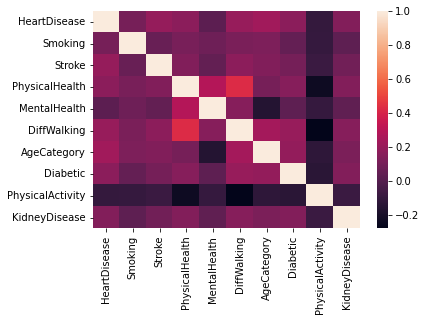

In [122]:
sns.heatmap(data.corr())
plt.show()

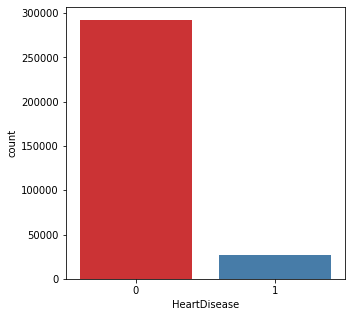

In [123]:
#Mostramos la cantidad de personas que tienen o no una enfermedad del corazon
f, ax = plt.subplots(figsize=(5,5))
ax = sns.countplot(x="HeartDisease", data=data, palette="Set1")
plt.show()

* ### **Dividir el Conjunto de Datos**
Necesitamos dividir nuestros datos en dos partes


*   Enfermos del corazon
*   No enfermos



In [124]:
features_mean = list(data.columns[1:-1])
dfE=data[data["HeartDisease"]==1]
dfNE=data[data["HeartDisease"]==0]

In [125]:
dfE.head(10)

,HeartDisease,Smoking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,Diabetic,PhysicalActivity,KidneyDisease
5,1,1,0,6.0,0.0,1,11,0,0,0
10,1,1,0,30.0,0.0,1,8,2,0,0
35,1,1,1,10.0,0.0,1,11,2,1,0
42,1,0,0,0.0,0.0,1,12,2,0,0
43,1,1,0,6.0,2.0,1,11,2,1,1
45,1,1,0,3.0,0.0,0,10,0,0,0
77,1,0,0,0.0,0.0,0,7,0,1,0
78,1,1,0,30.0,30.0,0,10,2,1,1
101,1,1,0,30.0,30.0,1,10,0,1,0
127,1,0,0,2.0,0.0,1,10,2,0,0


In [126]:
dfNE.head(10)

,HeartDisease,Smoking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,Diabetic,PhysicalActivity,KidneyDisease
0,0,1,0,3.0,30.0,0,7,2,1,0
1,0,0,1,0.0,0.0,0,12,0,1,0
2,0,1,0,20.0,30.0,0,9,2,1,0
3,0,0,0,0.0,0.0,0,11,0,0,0
4,0,0,0,28.0,0.0,1,4,0,1,0
6,0,0,0,15.0,0.0,0,10,0,1,0
7,0,1,0,5.0,0.0,1,12,2,0,0
8,0,0,0,0.0,0.0,0,12,1,0,1
9,0,0,0,0.0,0.0,1,9,0,1,0
11,0,1,0,0.0,0.0,0,7,0,1,0


In [127]:
#data[features_mean]

## **4. Imputar datos**
Para este no tenemos datos faltantes.

## **Paso 2**
* ### **Preparar el Conjunto de Datos**

* ### **Dividir el Conjunto de Datos**
Necesitamos dividir nuestros datos en dos partes

1.   Para el entramiento del modelo
2.   Para las pruebas del modelo 




In [128]:
data.head()

,HeartDisease,Smoking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,Diabetic,PhysicalActivity,KidneyDisease
0,0,1,0,3.0,30.0,0,7,2,1,0
1,0,0,1,0.0,0.0,0,12,0,1,0
2,0,1,0,20.0,30.0,0,9,2,1,0
3,0,0,0,0.0,0.0,0,11,0,0,0
4,0,0,0,28.0,0.0,1,4,0,1,0


In [129]:
x = data.drop(['HeartDisease'], axis = 1)
y = data['HeartDisease']

In [130]:
x

,Smoking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,Diabetic,PhysicalActivity,KidneyDisease
0,1,0,3.0,30.0,0,7,2,1,0
1,0,1,0.0,0.0,0,12,0,1,0
2,1,0,20.0,30.0,0,9,2,1,0
3,0,0,0.0,0.0,0,11,0,0,0
4,0,0,28.0,0.0,1,4,0,1,0
...,...,...,...,...,...,...,...,...,...
319790,1,0,7.0,0.0,1,8,2,0,0
319791,1,0,0.0,0.0,0,3,0,1,0
319792,0,0,0.0,0.0,0,5,0,1,0
319793,0,0,0.0,0.0,0,1,0,0,0


In [131]:
y

0         0
1         0
2         0
3         0
4         0
         ..
319790    1
319791    0
319792    0
319793    0
319794    0
Name: HeartDisease, Length: 319795, dtype: int8

In [132]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state= 1)

In [133]:
x_test

,Smoking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,Diabetic,PhysicalActivity,KidneyDisease
301988,0,0,0.0,15.0,0,4,0,1,0
223127,1,1,0.0,0.0,1,12,2,0,0
216797,1,0,0.0,0.0,0,10,0,1,0
234217,1,0,0.0,20.0,0,1,0,0,0
30822,0,0,0.0,0.0,0,11,2,1,0
...,...,...,...,...,...,...,...,...,...
226961,1,0,0.0,0.0,0,12,2,1,0
155461,1,0,20.0,0.0,0,9,2,0,0
63221,1,0,0.0,26.0,0,3,0,1,0
199991,0,0,0.0,4.0,1,1,0,0,0


In [134]:
x_train

,Smoking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,Diabetic,PhysicalActivity,KidneyDisease
278369,0,0,7.0,0.0,1,10,1,0,0
314581,0,1,0.0,0.0,0,7,0,1,0
145597,0,0,3.0,3.0,0,2,0,1,0
76470,1,0,0.0,1.0,0,9,0,1,0
167691,0,0,0.0,0.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
117583,1,0,0.0,0.0,1,12,0,1,0
73349,1,0,0.0,0.0,0,7,0,0,0
312201,1,0,30.0,0.0,0,8,0,0,0
267336,0,0,0.0,5.0,0,5,0,1,0


In [135]:
y_test

301988    0
223127    1
216797    0
234217    0
30822     1
         ..
226961    1
155461    0
63221     0
199991    0
228550    0
Name: HeartDisease, Length: 105533, dtype: int8

In [136]:
y_train

278369    0
314581    0
145597    0
76470     0
167691    0
         ..
117583    0
73349     0
312201    0
267336    0
128037    0
Name: HeartDisease, Length: 214262, dtype: int8

## **Paso 4**
* ### **Entrenar el Modelo**

* ### **Hacer las Predicciones**


In [137]:
logistic = LogisticRegression(max_iter=4000)

In [138]:
logistic.fit(x_train, y_train)

LogisticRegression(max_iter=4000)

In [139]:
y_pred = logistic.predict(x_test)

In [140]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: %s" % "{0:.3%}".format(accuracy))

Accuracy: 91.502%


In [141]:
precision = metrics.precision_score(y_test, y_pred)
print("Precision: %s" % "{0:.3%}".format(precision))

Precision: 50.660%


# Metricas de clasificacion


1.   Matriz de confusion



In [148]:
cm = metrics.confusion_matrix(y_test, y_pred, labels=[0, 1])
df_cm = pd.DataFrame(cm)
df_cm.rename(columns={0:'Sanos del corazon', 1:'Enfermos del corazon'}, index={0:'Sanos del corazon', 1:'Enfermos del corazon'}, inplace=True)
df_cm

,Sanos del corazon,Enfermos del corazon
Sanos del corazon,95874,673
Enfermos del corazon,8295,691


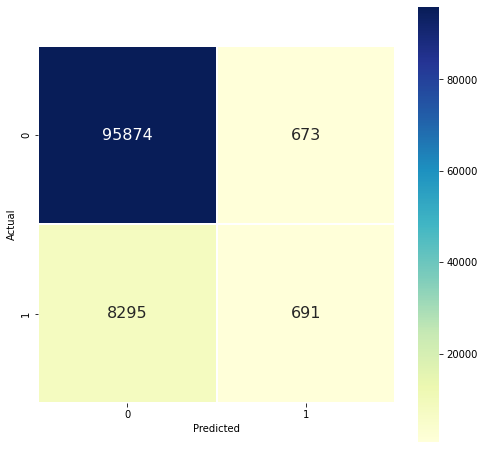

In [149]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(cm, fmt='.0f',
            cmap='YlGnBu', linewidth=1,
            square=True, annot=True, annot_kws={'fontsize':16}, ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

plt.show()

In [150]:
print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalsos Positives(FP) = ', cm[0,1])

print('\nFalsos Negatives(FN) = ', cm[1,0])


True Positives(TP) =  95874

True Negatives(TN) =  691

Falsos Positives(FP) =  673

Falsos Negatives(FN) =  8295
